# 1. Kutubxonalarni import qilish

Logistic Regression modeli uchun kerakli kutubxonalarni quyidagicha yuklashimiz kerak:

In [41]:
# Kerakli kutubxonalarni import qilamiz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Bu qismda biz kerakli kutubxonalarni yuklayapmiz:

- `numpy`: matematik hisob-kitoblar uchun,
- `pandas`: ma'lumotlarni boshqarish va tahlil qilish uchun,
- `matplotlib`: grafiklar yaratish uchun,
- `train_test_split`: ma'lumotlarni o'qitish va test uchun ajratish uchun,
- `LogisticRegression`: Logistic Regression modelini yaratish uchun,
- `accuracy_score`: modelning aniqlik darajasini hisoblash uchun,
- `confusion_matrix`: adashish matritsasini qurish uchun.


# 2. Ma'lumot to'plamini yaratish

Endi oddiy ma'lumotlar to‘plamini yaratamiz. Bu bosqichda biz kirish qiymatlari va ularning tasniflangan natijalarini tuzamiz. 

In [42]:
# Oddiy ma'lumotlar to'plamini yaratamiz
data = {
    'Test_bal': [50, 60, 70, 80, 90, 30, 40, 60, 80, 90],
    'O\'tdimi_yoqmi': [0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
}

# Pandas DataFrame formatida ma'lumotlarni shakllantiramiz
df = pd.DataFrame(data)
df


,Test_bal,O'tdimi_yoqmi
0,50,0
1,60,0
2,70,1
3,80,1
4,90,1
5,30,0
6,40,0
7,60,0
8,80,1
9,90,1


Nima uchun bu kerak?

  -  `DataFrame`: Pandas yordamida ma'lumotlar to'plami yaratib, uni ma'lum bir strukturada ishlatamiz. Bu usulda kirish ma'lumotlari (test ballari) va natija (imtihondan o'tgan yoki o'tmagan) bir joyga jamlanadi.

# 3. Kirish (X) va natija (Y) qismlarini ajratish

Endi ma'lumotlarni kirish (X) va natija (Y) qismlariga ajratamiz.

In [43]:
# Kirish ma'lumotlari (X) va natija (Y) qismlarini ajratamiz
X = df['Test_bal'].values.reshape(-1, 1)  # Kirish ma'lumotlari: test ballari
Y = df['O\'tdimi_yoqmi'].values  # Natija: imtihondan o‘tgan yoki o‘tmagan (0 yoki 1)


Nima uchun bu kerak?

  -  `X` — Modelga kiradigan o‘zgaruvchilar. Bu kirish ma'lumotlari (test ballari), ya'ni o‘qituvchi modelning qaysi xususiyatlari bo'yicha o‘rganishini belgilaydi.
  -  `Y` — Modelning natijasi, ya'ni model qaysi sinfga (0 yoki 1) ajratishni o‘rganishi kerak bo‘lgan narsa.

`reshape(-1, 1)` funksiyasi ma'lumotlarni o'qitishga qulay shaklda joylash uchun ishlatiladi.

# 4. Ma'lumotlarni o'qitish va test uchun ajratish

Ma'lumotlarni o'qitish va test uchun ikkiga ajratamiz. Test ma'lumotlari yordamida keyinchalik modelning natijasini baholaymiz.

In [44]:
# Ma'lumotlarni o'qitish va test uchun bo'lamiz
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Nima uchun bu kerak?

  -  `train_test_split`: Bu funksiya ma'lumotlar to'plamini tasodifiy ravishda o'qitish va test qismlariga bo'ladi. O'qitish uchun 80%, test uchun 20% ajratildi.
  -  `random_state=42`: Ma'lumotlarni har safar bir xil tarzda tasodifiy ajratish uchun ishlatiladi, natijalar bir xilda bo‘lishini ta’minlaydi.

# 5. Logistic Regression modelini yaratish

Endi Logistic Regression modelini yaratamiz.

In [45]:
# Logistic Regression modelini yaratamiz
log_reg_model = LogisticRegression()

Nima uchun bu kerak?

  -  Bu qadamda biz Logistic Regression modelini yaratamiz. Ushbu model ma'lumotlarni o'qitadi va tasniflash natijasini beradi.

# 6. Modelni o'qitish

Endi modelni o'qitamiz.

In [46]:
# Modelni o'qitish (train)
log_reg_model.fit(X_train, Y_train)


LogisticRegression()

Nima uchun bu kerak?

  -  `fit()` funksiyasi yordamida modelga ma'lumotlarni o'rgatamiz. Model kirish ma'lumotlari asosida qaysi sinfga ajratishni o'rganadi. Shu qadamda modelni haqiqiy o'qitish bosqichi bajariladi.

# 7. Model yordamida bashorat qilish

Modelni o'rgatgandan so'ng, test ma'lumotlaridan foydalanib, natijani bashorat qilamiz.

In [47]:
# Test ma'lumotlari bo'yicha bashorat qilamiz
Y_pred = log_reg_model.predict(X_test)


Nima uchun bu kerak?

   - `predict()` funksiyasi test ma'lumotlaridagi natijalarni bashorat qilish uchun ishlatiladi. O‘qitilgan model test ma'lumotlarini ko‘rib, natijani 0 yoki 1 ga ajratadi. 

# 8. Model aniqligini tekshirish

Aniqlik darajasini hisoblab ko'ramiz. 

In [48]:
# Aniqlik darajasini hisoblaymiz
accuracy = accuracy_score(Y_test, Y_pred)

# Foiz formatida aniqlikni chiqaramiz
accuracy_percentage = accuracy * 100
print(f"Aniqlik: {accuracy_percentage:.2f}%")


Aniqlik: 100.00%


# 9. Adashish matritsasini ko'rish

Modelning tasniflash qanchalik aniq ekanligini ko'rsatish uchun adashish matritsasini yaratamiz.

In [49]:
# Adashish matritsasini hisoblaymiz
cm = confusion_matrix(Y_test, Y_pred)
print(f"Adashish matritsasi:\n{cm}")


Adashish matritsasi:
[[1 0]
 [0 1]]


Nima uchun bu kerak?

   - `Confusion matrix` — Modelning tasniflashda qayerda xatolar qilayotganini ko'rsatadi. Bu matritsa yordamida to‘g‘ri va noto‘g‘ri tasniflangan ma'lumotlar aniqlanadi.

# 10. Sigmoid funksiyasini chizish

Logistic Regressionning asosiy elementi bo'lgan sigmoid funktsiyasini chizamiz.

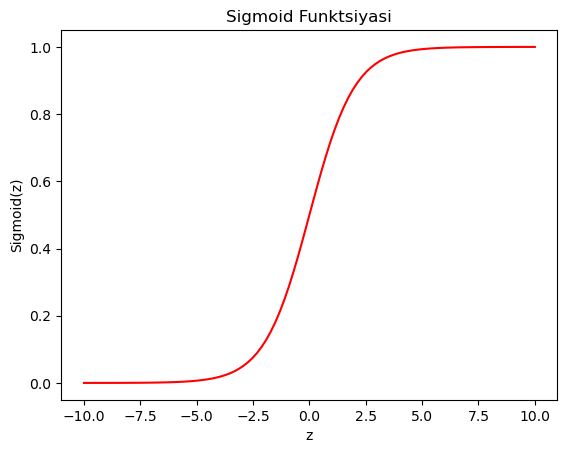

In [50]:
# Sigmoid funktsiyasini chizamiz
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z), color='red')
plt.title('Sigmoid Funktsiyasi')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.show()


Nima uchun bu kerak?

  -  Sigmoid funktsiyasi `Logistic Regressionning` asosiy elementidir, u qiymatlarni 0 va 1 orasida ehtimoliyatga o‘giradi. Ushbu grafik sigmoid funksiyasining qanchalik samarali ishlashini ko‘rsatadi.

#  Modelni sinovdan o'tkazish

In [62]:
numbers = np.arange(1, 201)
np.random.shuffle(numbers)

test_scores = numbers.reshape(-1, 1)

# Model yordamida bashorat qilish
model_predictions = log_reg_model.predict(test_scores)


print("Sinov ma'lumotlar (test ballari):", test_scores.flatten())
print("Bashorat qilingan natijalar:", model_predictions)


Sinov ma'lumotlar (test ballari): [ 71   8  15  76 165 184  20  45 176  66  59 159 136 182 137 152 149 158
 111  24  19 160  50 162  38   2 129  31   3   5  12   4 142  83 113  85
 143  78  74 187  49 195 132 179 197 167 191  39 164 105  14 131 171 110
 172   7 192  10 198 183  36 134  87  72  51 150   9   6 126 116 103  81
 123  40  67  42 173 106  56  43 124  29 190  16 153 141 186  96  25 151
 121  92  77 193  27  64 178  98 185  95 140 108 117 199 130 188 146  26
  23 148 127  63  48 189  91  75 155  22  70 144  35 181  80  13  32 157
  30  90 107 163 114   1 102  54  69 200 115 100  82 174  21  89  44 138
 109 120  53  88 122  11 156  33  41  52  46 104 125  99  58  73 101  55
  47 128  17 170  84  28  34 169 133  93 161 135 177  60  68 175 168 180
 196  65 194  79  18  86  37  94 145 119  97 118  61  57 154  62 112 139
 147 166]
Bashorat qilingan natijalar: [1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 

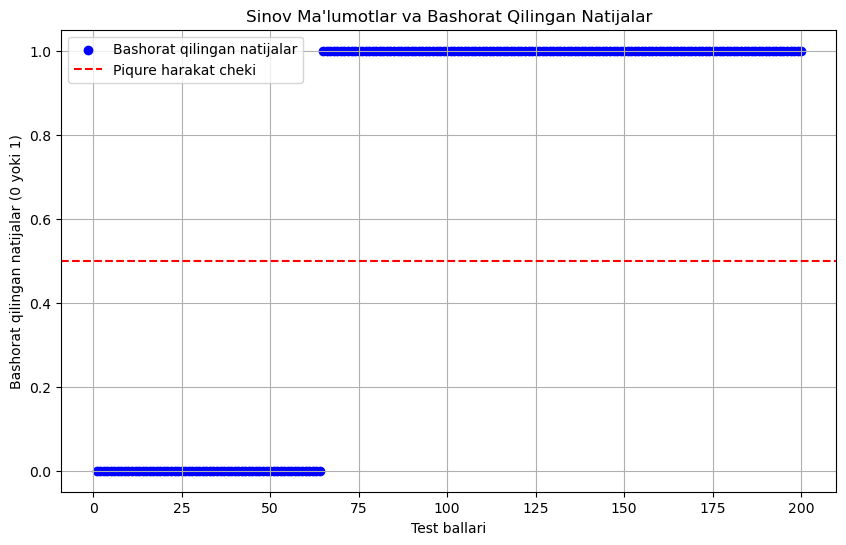

In [84]:
# Ma'lumotlarni grafikda ko'rsatish
plt.figure(figsize=(10, 6))

# Sinov test ballarini va bashorat qilingan natijalarni chizamiz
plt.scatter(test_scores, model_predictions, color='blue', label='Bashorat qilingan natijalar')

# Grafikni bezatamiz
plt.title('Sinov Ma\'lumotlar va Bashorat Qilingan Natijalar')
plt.xlabel('Test ballari')
plt.ylabel('Bashorat qilingan natijalar (0 yoki 1)')
plt.axhline(y=0.5, color='red', linestyle='--', label='Piqure harakat cheki')
plt.legend()
plt.grid(True)

# Grafikni ko'rsatamiz
plt.show()
